Available keys in file:
- Tstart: shape=(1, 1)
- Tinterval: shape=(1, 1)
- ExtraSamples: shape=(1, 1)
- RequestedLength: shape=(1, 1)
- Length: shape=(1, 1)
- Version: shape=(11,)
- TDX1: shape=(260416673, 1)
- TDX2: shape=(260416673, 1)
- TDX3: shape=(260416673, 1)
- TDX1_enlarged: shape=(260416673, 1)
Using channel: TDX1
Sampling rate from file: 52.1 MHz


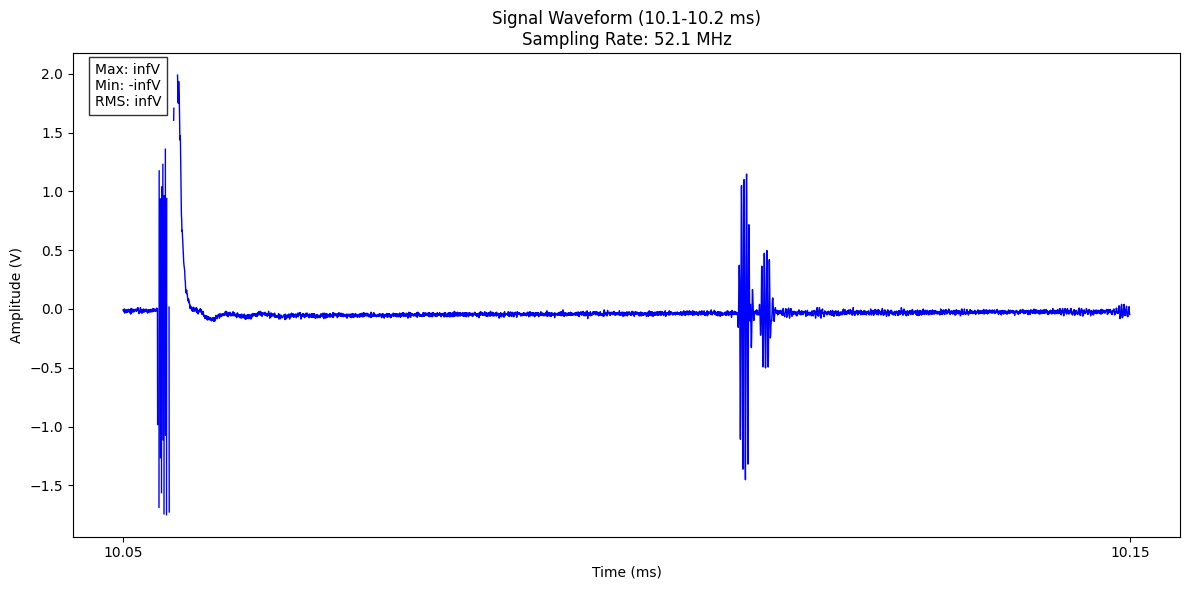

In [3]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
def plot_signal_waveform(file_path, start_ms=0, end_ms=100):
    """
    Display signal waveform from .mat file
    
    Parameters:
    -----------
    file_path : str
        Path to .mat file
    start_ms : float 
        Start time (milliseconds)
    end_ms : float
        End time (milliseconds)
    """
    # Load and inspect data
    mat_data = sio.loadmat(file_path)
    
    # Display available keys
    print("Available keys in file:")
    for key in mat_data.keys():
        if not key.startswith('__'):
            print(f"- {key}: shape={mat_data[key].shape}")
    
    # Try different possible channel names
    channel_names = ['TDX1', 'A', 'B', 'Channel_A', 'Channel_1']
    signal = None
    
    for name in channel_names:
        if name in mat_data:
            signal = mat_data[name].flatten()
            print(f"Using channel: {name}")
            break
    
    if signal is None:
        raise ValueError("No valid channel found in the file")
    
    # Get sampling frequency
    if 'Tinterval' in mat_data:
        sampling_interval = mat_data['Tinterval'][0][0]  # sampling interval (s)
        sampling_rate = 1 / sampling_interval
        print(f"Sampling rate from file: {sampling_rate/1e6:.1f} MHz")
    else:
        print("Warning: Sampling rate not found, using default 62.5MHz")
        sampling_rate = 62.5e6  # Hz
    
    # Generate time axis (milliseconds)
    time_ms = np.arange(len(signal)) / sampling_rate * 1000
    
    # Limit display range
    mask = (time_ms >= start_ms) & (time_ms <= end_ms)
    
    # Create plot
    plt.figure(figsize=(12, 6))
    plt.plot(time_ms[mask], signal[mask], 'b-', linewidth=1)
    #plt.grid(True, which='both')
    #plt.minorticks_on()
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (V)')
    plt.title(f'Signal Waveform ({start_ms:.1f}-{end_ms:.1f} ms)\nSampling Rate: {sampling_rate/1e6:.1f} MHz')
    
    # Set x-axis ticks
    tick_interval = 0.1  # 0.1ms intervals
    plt.xticks(np.arange(start_ms, end_ms+tick_interval, tick_interval))
    
    # Display statistics
    signal_section = signal[mask]
    plt.text(0.02, 0.98, 
             f'Max: {np.max(signal_section):.3f}V\n'
             f'Min: {np.min(signal_section):.3f}V\n'
             f'RMS: {np.sqrt(np.mean(signal_section**2)):.3f}V',
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8),
             verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Run analysis
#file_path = '/mnt/sdb/matsubara/tmp/sensor_data.mat'
file_path = "/mnt/matsubara/signals_exp/2024/P20241007-0959.mat"
plot_signal_waveform(file_path, start_ms=10.05, end_ms=10.15)